In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_theme(context='talk', style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 18
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.family'] = 'HSE Slab'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelweight'] =  'semibold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.unicode_minus'] = 'false'
# plt.rc('axes', unicode_minus=False)


In [8]:
healthy = pd.read_csv('../Arseny/healthy_new_cols.csv')
infr = pd.read_csv('../Arseny/myocardial_infarction_new_cols.csv')
infr_6 = pd.read_csv('../Arseny/myocardial_infarction_6mo_new_cols.csv')
hyper = pd.read_csv('../Arseny/arterial_hypertension_new_cols.csv')


In [26]:
def remove_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr)))]
    return data

In [113]:
sdnn = {
    "healthy": remove_outliers_iqr(healthy["lying_rrg_sdnn"]) * 1000,
    "infr": remove_outliers_iqr(infr["lying_rrg_sdnn"]) * 1000,
    "infr_6": remove_outliers_iqr(infr_6["lying_rrg_sdnn"]) * 1000,
    "hyper": remove_outliers_iqr(hyper["lying_rrg_sdnn"]) * 1000,
}

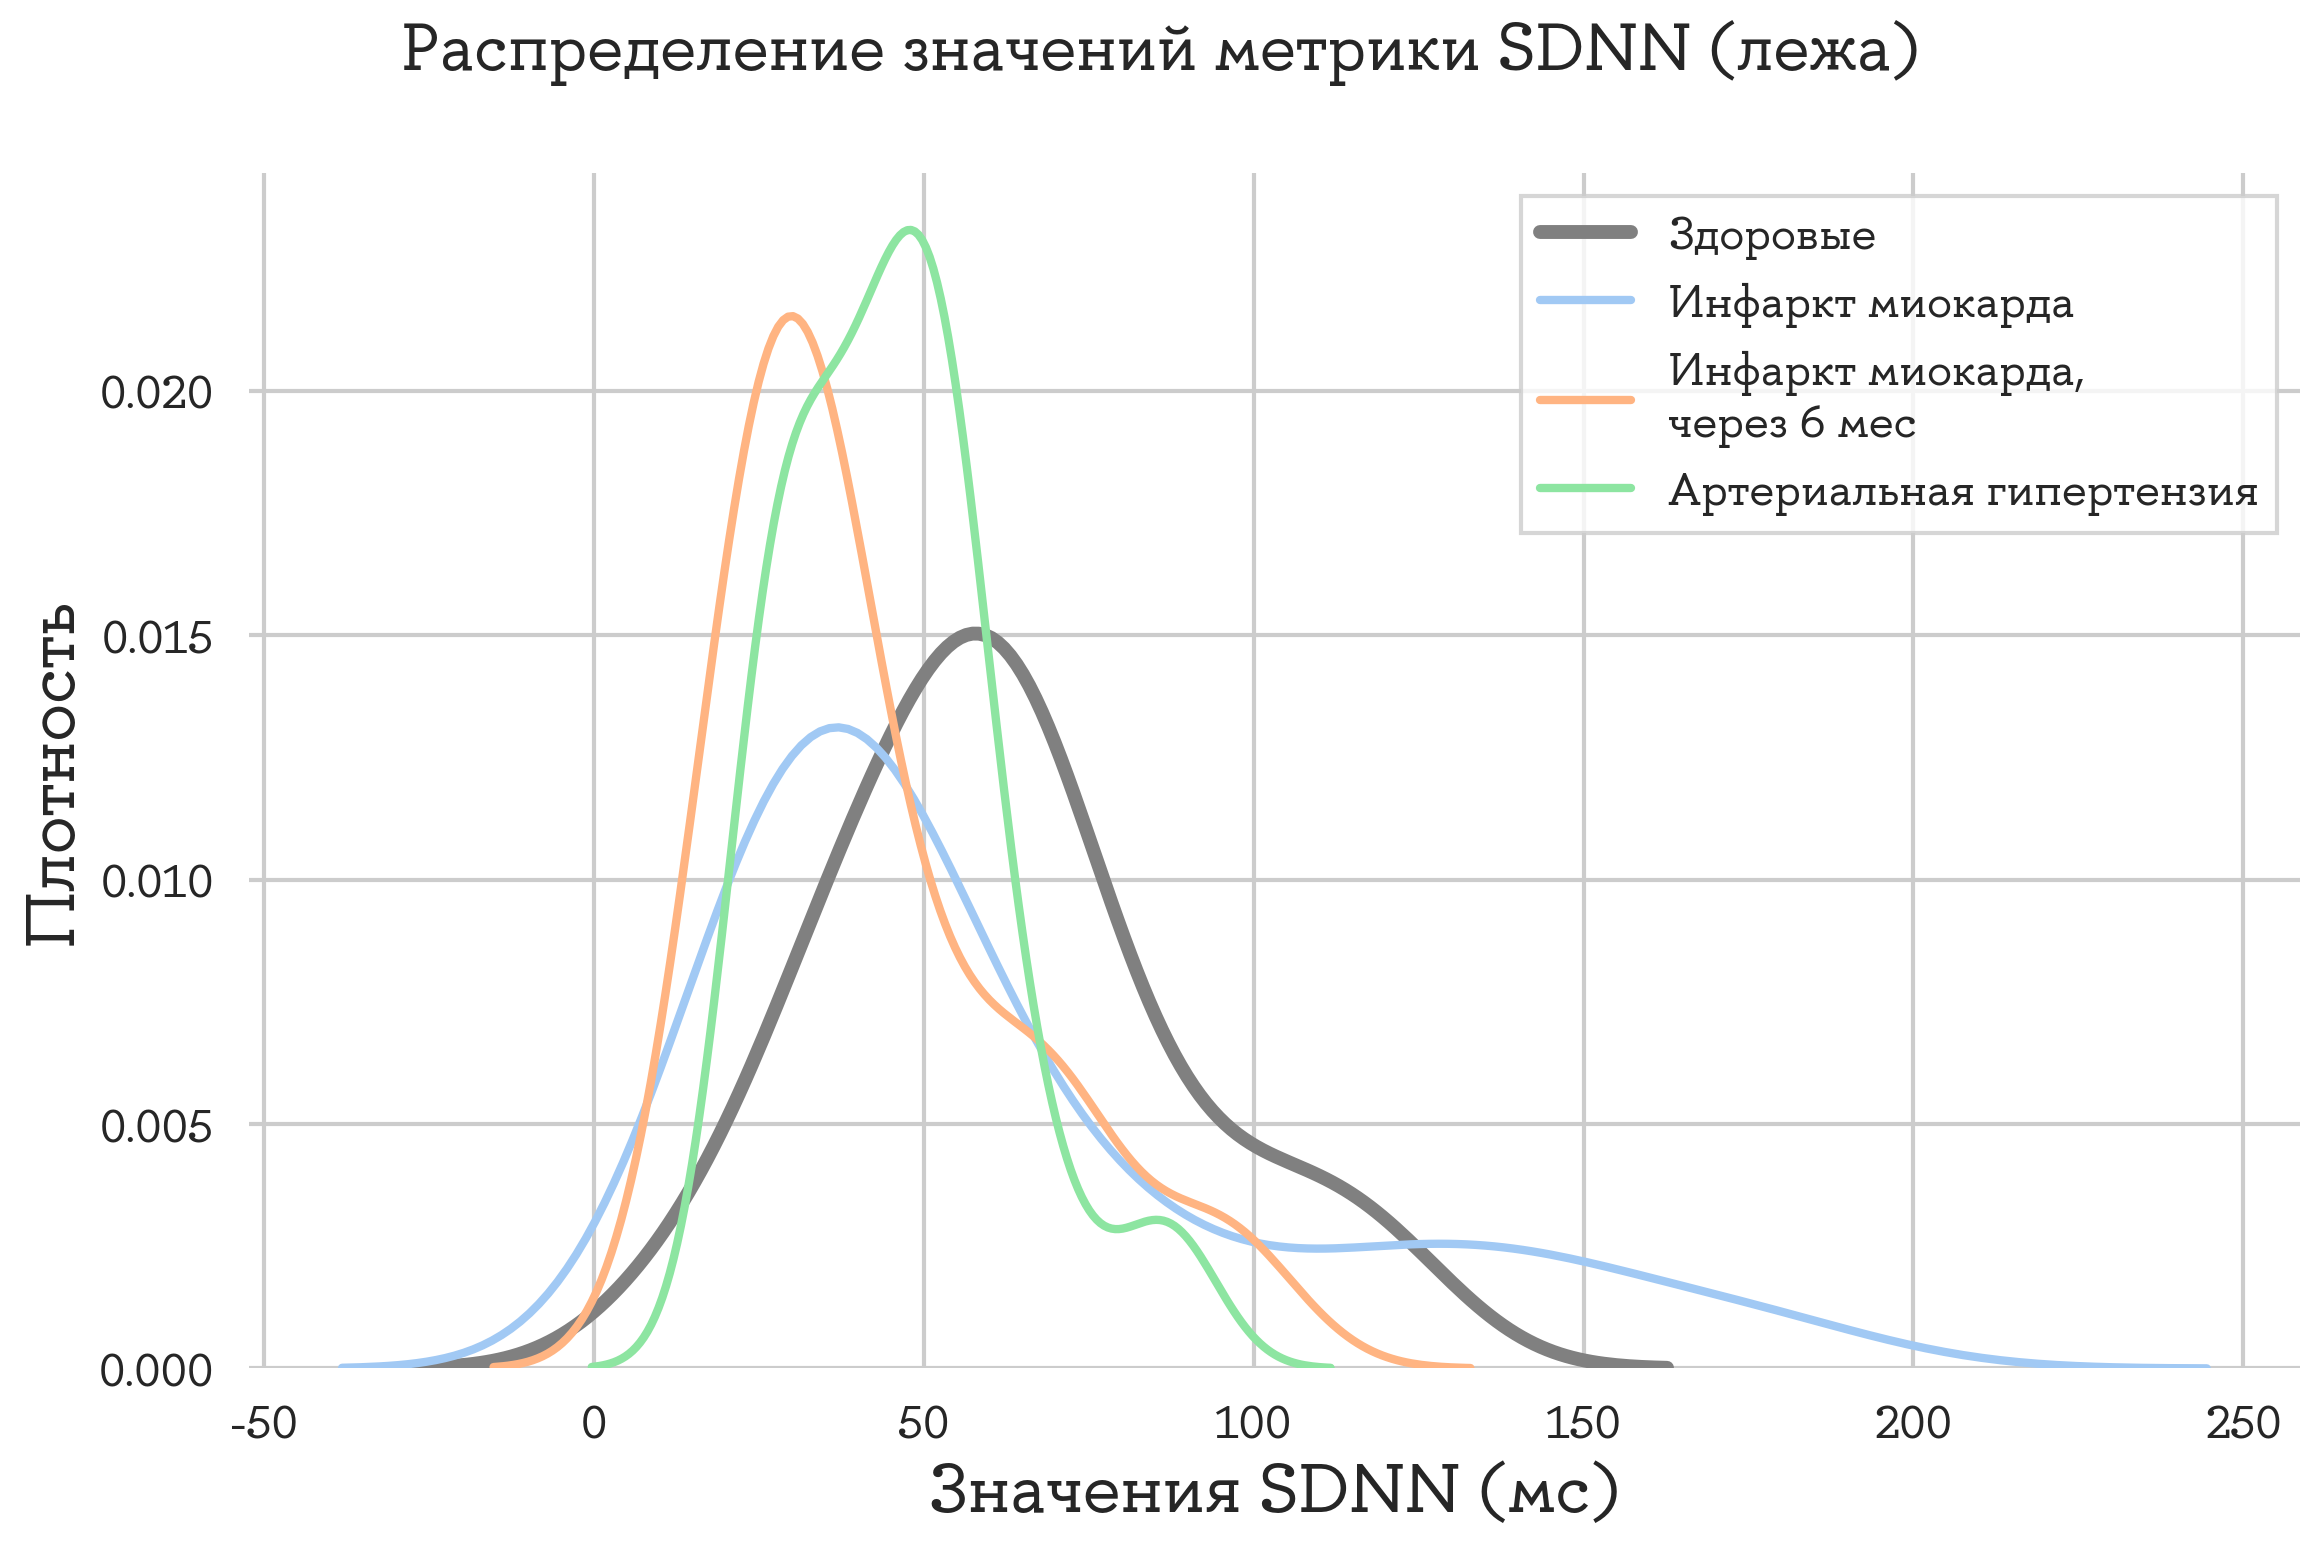

In [115]:
fig, ax = plt.subplots()
sns.kdeplot(sdnn["healthy"], label="Здоровые", linewidth=5, color='grey')
sns.kdeplot(sdnn["infr"], label="Инфаркт миокарда", linewidth=3)
sns.kdeplot(sdnn["infr_6"], label="Инфаркт миокарда, \nчерез 6 мес", linewidth=3)
sns.kdeplot(sdnn["hyper"], label="Артериальная гипертензия", linewidth=3)
ax.set_xlabel('Значения SDNN (мс)')
ax.set_ylabel('Плотность')
fig.suptitle('Распределение значений метрики SDNN (лежа)')
plt.legend()

In [116]:
round(stats.ttest_ind(sdnn['healthy'], sdnn['infr_6']).pvalue, 4)

0.0005

In [117]:
round(stats.ttest_ind(sdnn['healthy'].dropna(), sdnn['infr'].dropna(), equal_var=False).pvalue, 4)

0.9723

In [118]:
round(stats.ttest_ind(sdnn['healthy'], sdnn['hyper'], equal_var=False).pvalue, 4)

0.0027

In [88]:
round(stats.levene(sdnn['healthy'], sdnn['infr_6']).pvalue, 4)

0.3848

In [89]:
round(stats.levene(sdnn['healthy'], sdnn['infr']).pvalue, 4)

0.0891

In [90]:
round(stats.levene(sdnn['healthy'], sdnn['hyper']).pvalue, 4)

0.0129

In [112]:
(
    (sdnn["healthy"] < .050).sum(),
    ((50 < sdnn["healthy"]*1000) & (sdnn["healthy"] < )).sum(),
    (sdnn["healthy"] > .100).sum(),
)

(9, 19, 4)

In [108]:
healthy['lying_rrg_sdnn'] *1000


0      74.997248
1      41.112879
2      57.170199
3     122.494091
4      61.787418
5      37.024329
6      32.676635
7      34.275836
8      17.912710
9     107.209154
10     34.462412
11     61.108480
12     40.491623
13     51.824600
14     51.321477
15     36.152250
16     65.746829
17     65.576902
18     54.175586
19     54.453583
20    134.404908
21     79.076275
22     93.992001
23     85.552180
24     12.323770
25     55.295928
26     73.599971
27     59.491548
28     64.180169
29    103.521300
30     59.941696
31    117.179061
32     73.529913
Name: lying_rrg_sdnn, dtype: float64